# 函数的拟合

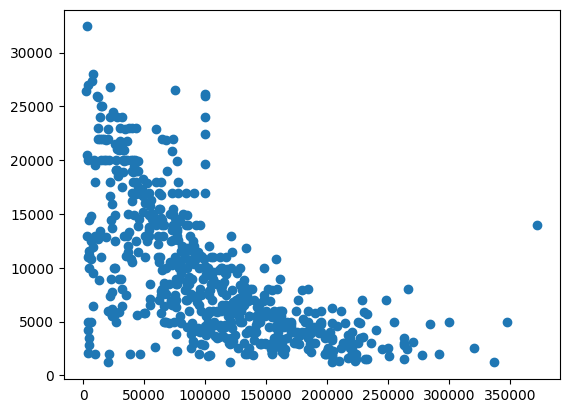

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from car_data import *

def draw_scatter(data):
    plt.scatter(*zip(*data)) # 绘制里程和价格的散点图

draw_scatter([(p.mileage, p.price) for p in priuses])

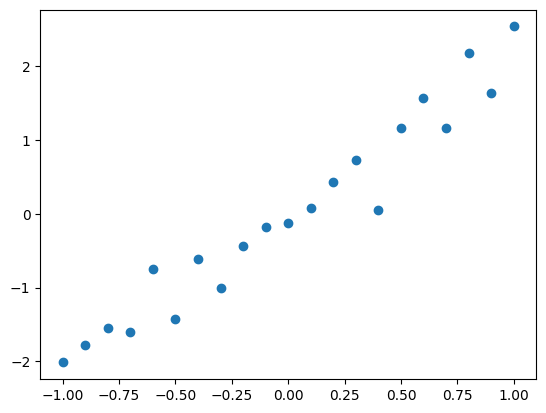

In [4]:
# 测试用的简单数据集

test_data = [
     (-1.0, -2.0137862606487387),
     (-0.9, -1.7730222478628337),
     (-0.8, -1.5510125944820812),
     (-0.7, -1.6071832453434687),
     (-0.6, -0.7530149734137868),
     (-0.5, -1.4185018340443283),
     (-0.4, -0.6055579756271128),
     (-0.3, -1.0067254915961406),
     (-0.2, -0.4382360549665138),
     (-0.1, -0.17621952751051906),
     (0.0, -0.12218090884626329),
     (0.1, 0.07428573423209717),
     (0.2, 0.4268795998864943),
     (0.3, 0.7254661223608084),
     (0.4, 0.04798697977420063),
     (0.5, 1.1578103735448106),
     (0.6, 1.5684111061340824),
     (0.7, 1.157745051031345),
     (0.8, 2.1744401978240675),
     (0.9, 1.6380001974121732),
     (1.0, 2.538951262545233)
]

draw_scatter(test_data)

In [5]:
# 评价函数

def sum_error(f, data):
    errors = [abs(f(x) - y) for (x, y) in data]
    return sum(errors)

# 猜测两个函数来作为模型
def f(x):
    return 2 * x

def g(x):
    return 1 - x

print("f sum_error: ", sum_error(f, test_data))
print("g sum_error: ", sum_error(g, test_data))

# 这里使用f(x)的值小一些，证明作为模型的评价更好

f sum_error:  5.021727176394801
g sum_error:  38.47711311130152


In [6]:
# 换一个评价函数，这是作者常用的评价函数

def sum_squared_error(f, data):
    squared_errors = [(f(x) - y) ** 2 for (x, y) in data]
    return sum(squared_errors)

print("f sum_error: ", sum_squared_error(f, test_data))
print("g sum_error: ", sum_squared_error(g, test_data))

f sum_error:  2.105175107540148
g sum_error:  97.1078879283203


In [7]:
# 猜测三个一次函数作为汽车里程和价格关系的模型

def p1(x):
    return 25000 - 0.2 * x

def p2(x):
    return 25000 - 0.1 * x

def p3(x):
    return 22500 - 0.1 * x

priuse_mileage_price = [(p.mileage, p.price) for p in priuses]

print("p1:", sum_squared_error(p1, priuse_mileage_price))
print("p2:", sum_squared_error(p2, priuse_mileage_price))
print("p3:", sum_squared_error(p3, priuse_mileage_price))

# 从结果来看p3最好

p1: 88782506640.23996
p2: 34723507681.560005
p3: 22997230681.559998


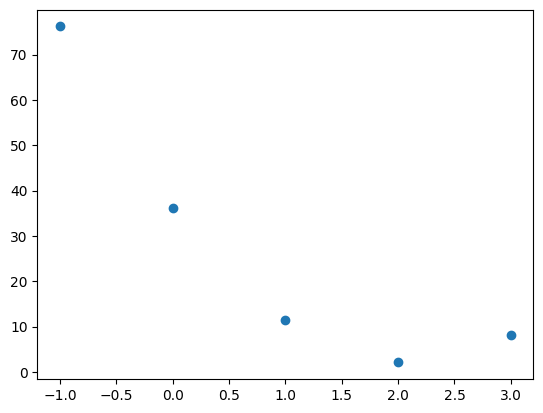

In [8]:
# 取参数a，并自动测试

def test_data_coefficient_cost(a):
    def f(x):
        return a * x
    return sum_squared_error(f, test_data)

test_a = [a for a in range(-1, 4)]
test_cost = [test_data_coefficient_cost(a) for a in test_a]

draw_scatter(zip(test_a, test_cost))

# 在2.0处得到了最低的代价，证明a=2的时候的函数作为模型最好

C:\Users\richa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


<Figure size 700x700 with 0 Axes>

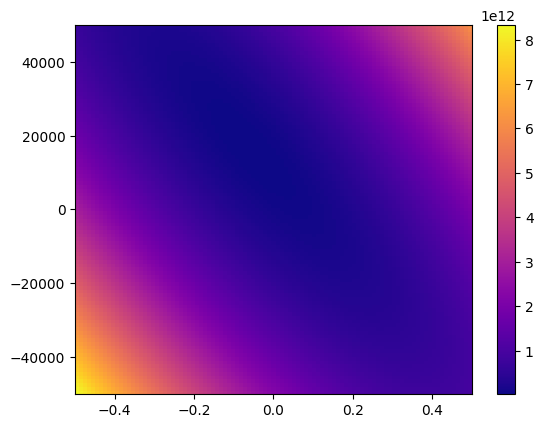

In [9]:
# 加入b的函数

def coefficient_cost(a, b):
    def p(x):
        return a * x + b
    return sum_squared_error(p, priuse_mileage_price)

def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

# 绘制a，b二维上的热力图，颜色代表cost
scalar_field_heatmap(coefficient_cost,-0.5,0.5,-50000,50000)

In [13]:
from part1lib import *


def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

# 缩放数据

def scaled_cost_function(c, d):
    return coefficient_cost(0.5*c, 50000*d) / 1e13

c, d = gradient_descent(scaled_cost_function,0,0)

print(c, d)

-0.121119017811592 0.3149542288802679


## 使用指数函数作为模型

C:\Users\richa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


<Figure size 700x700 with 0 Axes>

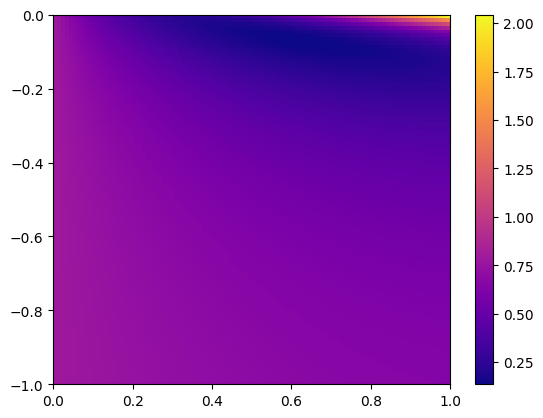

In [14]:
def exp_coefficient_cost(q, r):
    def f(x):
        return q * exp(r * x)
    return sum_squared_error(f, priuse_mileage_price)

def scaled_exp_coefficient_cost(s, t):
    return exp_coefficient_cost(30000*s, 1e-4*t) / 1e11

scalar_field_heatmap(scaled_exp_coefficient_cost, 0, 1, -1, 0)

In [15]:
s, t = gradient_descent(scaled_exp_coefficient_cost, 0, 0)
(s, t)

(0.6235404892845479, -0.07686877731125034)

In [16]:
q, r = 30000 * s, 1e-4 * t
(q, r)

(18706.214678536435, -7.686877731125035e-06)